_Author: Guoqing Wang (guoqing.wang@nasa.gov), OB.DAAC Scientist, NASA GSFC; SSAI_

**<ins>Read Chlorophyll data from standard L2 file into xarray, and plot it into a map</ins>**
</br>Xarray is a powerful Python library designed for working with labeled multi-dimensional arrays. It is particularly useful for handling NetCDF files. </br>
Matplotlib is a popular Python library for creating static, animated, and interactive visualizations in a variety of formats. It is widely used for data visualization and plotting. Cartopy is a Python library designed for geospatial data visualization on maps. It is built on top of Matplotlib and provides tools for creating maps, handling projections, and adding geographical features. </br>
This turtorial shows an example of using Xarray to read ocean color level 2 file and plot the chlorophyll map with matplotlib and cartopy. 

**1. Import packages** </br>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Imports
import netCDF4   as nc                     # pip install netCDF4
import xarray as xr                   # pip install xarray
import os
import numpy as np
import matplotlib.pyplot as plt

import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

**2. To read file with different groups, need to find out what are the groups and what variables are inside each group.** 

In [3]:
# Open the datasets with xarray
filename = 'AQUA_MODIS.20221007T175001.L2.OC.nc'
ds = xr.open_dataset(filename)
# # Open with netcdf4 to check the groups and variables
# f = nc.Dataset(filename, 'r')
# print(f)
# # print grouped variables
# print(f.groups.keys())
# print(f.groups['geophysical_data'].variables)
# # if you just want to see the variable names, use the following code
# print(f.groups['geophysical_data'].variables.keys())

# Load attributes
ds_geo = xr.open_dataset(filename, group='geophysical_data') 
ds_nav = xr.open_dataset(filename, group='navigation_data')

In [4]:
# Use .data_vars to find variable names
# ds['navigation_data'].data_vars
# ds['geophysical_data'].data_vars

# Read chlor_a, latitude, and longitude data from their respective groups
lat = ds_nav.latitude
lon = ds_nav.longitude
chlor_a = ds_geo.chlor_a
chlor = np.log10(chlor_a)

**3. Plot the chlorophyll-a data**</br>
    
- **Use matplotlib**

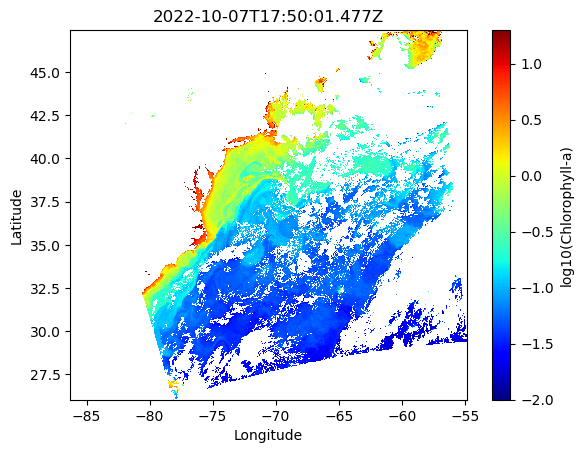

In [9]:
plt.pcolormesh(lon,lat,np.squeeze(chlor),cmap = 'jet', vmin=-2, vmax=1.3)
plt.title(ds.time_coverage_start)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='log10(Chlorophyll-a)',)

plt.show()

- **Use matplotlib and cartopy to plot map with basemap**

Text(0.5, 1.0, '2022-10-07T17:50:01.477Z')

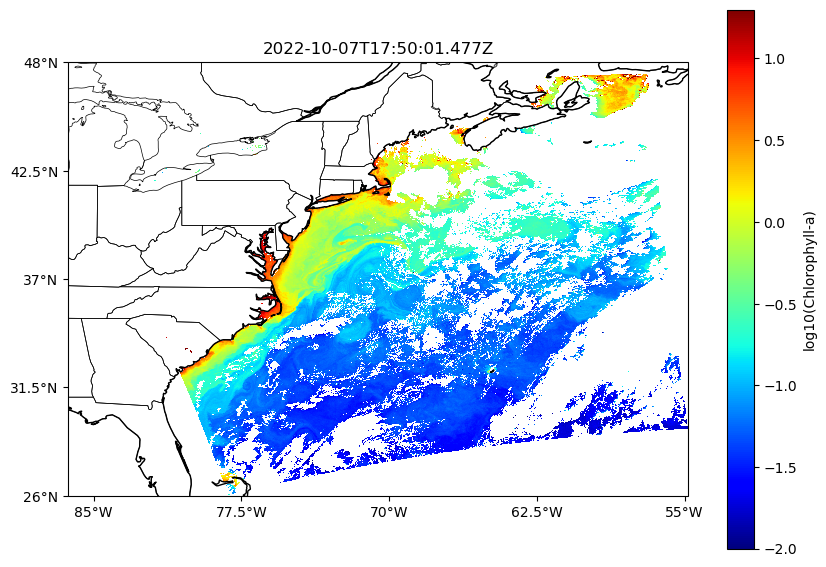

In [10]:
# Plot Chlor_a data
fig = plt.figure(figsize=(10, 7))
map_projection = cartopy.crs.PlateCarree()
ax = plt.axes(projection=map_projection)

im = ax.pcolormesh(lon, lat,np.squeeze(chlor),cmap = 'jet', vmin=-2, vmax=1.3)
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, linewidth=0.5)

ax.set_xticks(np.linspace(-85, -55, 5), crs=map_projection)
ax.set_yticks(np.linspace(26, 48, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, label='log10(Chlorophyll-a)')
plt.title(ds.time_coverage_start)